In [59]:
# Import Main Dependencies
import pandas as pd
import json
import requests
from pprint import pprint
import datetime as dt
import matplotlib.pyplot as plt
#import scipy.stats as st

# Import credentials string for PostgreSQL database access
from config import credentials

# Library and methods to connect and interact with database
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import Session
from sqlalchemy.orm import sessionmaker

# Getting Lobbyist Data using API calls

In [60]:
# API Call 1:  City of Chicago Lobbyist, Employer, Client Combinations Dataset

# save endpoint url (Limit to one record)
url = 'https://data.cityofchicago.org/resource/2eqz-3nvz.json?$limit=1'

# save endpoint response in json format
api_response = requests.get(url).json()

# inspect data for one record
pprint(json.dumps(api_response, indent=4, sort_keys=True))

('[\n'
 '    {\n'
 '        "client_id": "45323",\n'
 '        "client_name": "SDI PRESENCE LLC",\n'
 '        "employer_id": "19781",\n'
 '        "employer_name": "CROWZNEST CONSULTING, INC.",\n'
 '        "lobbyist_first_name": "DONALD",\n'
 '        "lobbyist_id": "11901",\n'
 '        "lobbyist_last_name": "ZOUFAL",\n'
 '        "lobbyist_middle_initial": "R",\n'
 '        "lobbyist_salutation": "MR.",\n'
 '        "year": "2023"\n'
 '    }\n'
 ']')


In [4]:
# API Call 1: Get full dataset

# save endpoint url - all records
url = 'https://data.cityofchicago.org/resource/2eqz-3nvz.json?$limit=50000'

# save endpoint response in json format
api_full_response = requests.get(url).json()

#pprint(json.dumps(api_full_response, indent=4, sort_keys=True))

In [5]:
# API Call 1: loop and store response

#Creating empty list to store response
lobbyist_combo_list = []

#looping through all api response to extract fields 
for lobbyist_record in api_full_response:
    
    #try/except logic to avoid errors
    try:
        client_id = lobbyist_record['client_id']
        client_name = lobbyist_record['client_name']
        employer_id = lobbyist_record['employer_id']
        employer_name = lobbyist_record['employer_name']
        lobbyist_first_name = lobbyist_record['lobbyist_first_name']
        lobbyist_id = lobbyist_record['lobbyist_id']
        lobbyist_last_name = lobbyist_record['lobbyist_last_name']
        lobbyist_middle_initial = lobbyist_record['lobbyist_middle_initial']
        lobbyist_salutation = lobbyist_record['lobbyist_salutation']
        year = lobbyist_record['year']
    
    except:
        #print(f'found empty data for lobbyist name {lobbyist_last_name}')
        pass
        
    
    #print(lobbyist_last_name)
    
    # adding extracted data into python list 
    lobbyist_combo_list.append({"client_id" : client_id,
                        "client_name" : client_name,
                        "employer_id": employer_id,
                        "employer_name" : employer_name,
                        "lobbyist_first_name" : lobbyist_first_name,
                        "lobbyist_id" : lobbyist_id,
                        "lobbyist_last_name": lobbyist_last_name,
                        "lobbyist_middle_initial" : lobbyist_middle_initial,
                        "lobbyist_salutation" : lobbyist_salutation,
                        "year" : year,
                        })
    
print("Data Retrieval Complete")

Data Retrieval Complete


In [6]:
# API Call 2: Contributions Dataset

# save endpoint url (Limit to one record)
url_two = 'https://data.cityofchicago.org/resource/p9p7-vfqc.json?$limit=1'
    
# save endpoint response in json format
api_response_two = requests.get(url_two).json()

# inspect data for one record
pprint(json.dumps(api_response_two, indent=4, sort_keys=True))


('[\n'
 '    {\n'
 '        "amount": "0",\n'
 '        "contribution_date": "2023-01-26T00:00:00.000",\n'
 '        "contribution_id": "1223522085",\n'
 '        "created_date": "2023-01-26T00:00:00.000",\n'
 '        "lobbyist_first_name": "ISSAC",\n'
 '        "lobbyist_id": "25242",\n'
 '        "lobbyist_last_name": "RIGGS",\n'
 '        "period_end": "2022-12-31T00:00:00.000",\n'
 '        "period_start": "2022-10-01T00:00:00.000",\n'
 '        "recipient": "0"\n'
 '    }\n'
 ']')


In [7]:
# API Call 2: Get full dataset

# save endpoint url - all records
url_two = 'https://data.cityofchicago.org/resource/p9p7-vfqc.json?$limit=10000'

# save endpoint response in json format
api_full_response_two = requests.get(url_two).json()

In [8]:
# API Call 2: loop and store response

# Creating empty list to store response
lobbyist_combo_list_two = []

#looping through all api response to extract fields 
for lobbyist_record in api_full_response_two:
    
    #try/except logic to avoid errors
    try:
        contribution_id = lobbyist_record['contribution_id']
        period_start = lobbyist_record['period_start']
        period_end = lobbyist_record['period_end']
        contribution_date = lobbyist_record['contribution_date']
        recipient = lobbyist_record['recipient']
        amount = lobbyist_record['amount']
        lobbyist_id = lobbyist_record['lobbyist_id']
        lobbyist_first_name = lobbyist_record['lobbyist_first_name']
        lobbyist_last_name = lobbyist_record['lobbyist_last_name']
        created_date = lobbyist_record['created_date']
    
    except:
        print(f'found empty data for lobbyist name {lobbyist_last_name}')
        pass
        
    
    #print(lobbyist_last_name)
    
    # adding extracted data into python list 
    lobbyist_combo_list_two.append({"contribution_id" : contribution_id,
                        "period_start" : period_start,
                        "period_end": period_end,
                        "contribution_date" : contribution_date,
                        "recipient" : recipient,      
                        "amount" : amount,
                        "lobbyist_id" : lobbyist_id,      
                        "lobbyist_first_name" : lobbyist_first_name,
                        "lobbyist_last_name": lobbyist_last_name,
                        "created_date" : created_date,
                       
                        })
    
print("Data Retrieval Complete")

Data Retrieval Complete


In [9]:
#API Call 3: Compensation Dataset

# save endpoint url (Limit to one record)
url = 'https://data.cityofchicago.org/resource/dw2f-w78u.json?$limit=1'

# save endpoint response in json format
api_response = requests.get(url).json()

# inspect data for one record
pprint(json.dumps(api_response, indent=4, sort_keys=True))


('[\n'
 '    {\n'
 '        "client_id": "498976702",\n'
 '        "client_name": "ANHEUSER BUSCH COMPANIES",\n'
 '        "compensation_amount": "15000",\n'
 '        "compensation_id": "1473879510",\n'
 '        "created_date": "2023-01-30T00:00:00.000",\n'
 '        "lobbyist_first_name": "TERRY",\n'
 '        "lobbyist_id": "3912",\n'
 '        "lobbyist_last_name": "GABINSKI",\n'
 '        "lobbyist_middle_initial": "M",\n'
 '        "period_end": "2023-03-31T00:00:00.000",\n'
 '        "period_start": "2023-01-01T00:00:00.000"\n'
 '    }\n'
 ']')


In [10]:
# API Call 3: Get full dataset

# save endpoint url - all records
url = 'https://data.cityofchicago.org/resource/dw2f-w78u.json?$limit=30000'

# save endpoint response in json format
api_full_response = requests.get(url).json()

# pprint(json.dumps(api_full_response, indent=4, sort_keys=True))


In [11]:
# API Call 3: loop and store response

# Creating empty list to store response
compensation_list = []

err_num = 0

#looping through all api data to extract fields
for compensation_record in api_full_response:
   
    #try/except logic to avoid errors
    try:
        client_id = compensation_record['client_id']
        client_name = compensation_record['client_name']
        compensation_amount = compensation_record['compensation_amount']
        compensation_id = compensation_record['compensation_id']
        lobbyist_first_name = compensation_record['lobbyist_first_name']
        lobbyist_id = compensation_record['lobbyist_id']
        lobbyist_last_name = compensation_record['lobbyist_last_name']
        lobbyist_middle_initial = compensation_record['lobbyist_middle_initial']
        period_end = compensation_record['period_end']
        period_start = compensation_record['period_start']
       
    except:
        # print(f'found empty data for compensation ID {compensation_id}')
        err_num = err_num + 1
        pass
   
    # adding extracted data into python list
    compensation_list.append({"client_id" : client_id,
                        "client_name" : client_name,
                        "compensation_amount": compensation_amount,
                        "compensation_id" : compensation_id,
                        "lobbyist_first_name" : lobbyist_first_name,
                        "lobbyist_id" : lobbyist_id,
                        "lobbyist_last_name": lobbyist_last_name,
                        "lobbyist_middle_initial" : lobbyist_middle_initial,
                        "period_end" : period_end,
                        "period_start" : period_start,
                        })
   
print(f"Data Retrieval Complete. {err_num} records had some missing data")


Data Retrieval Complete. 11466 records had some missing data


In [12]:
#API Call 4: Lobbyist Dataset

# save endpoint url (Limit to one record)
url = 'https://data.cityofchicago.org/resource/tq3e-t5yq.json?$limit=1'

# save endpoint response in json format
api_packed_response = requests.get(url).json()

# inspect data for one record
pprint(json.dumps(api_packed_response, indent=4, sort_keys=True))


('[\n'
 '    {\n'
 '        "address_1": "6969 W WABANSIA AVE",\n'
 '        "city": "CHICAGO",\n'
 '        "country": "United States",\n'
 '        "created_date": "2021-02-03T00:00:00.000",\n'
 '        "email": "Pericles@UChicago.edu",\n'
 '        "employer_id": "2281637536",\n'
 '        "employer_name": "THE PERICLES ORGANIZATION",\n'
 '        "fax": "(773) 309-8884",\n'
 '        "first_name": "PERICLES",\n'
 '        "last_name": "ABBASI",\n'
 '        "lobbyist_id": "18883",\n'
 '        "phone": "(773) 368-5423",\n'
 '        "salutation": "MR.",\n'
 '        "state": "IL",\n'
 '        "year": "2021",\n'
 '        "zip": "60707"\n'
 '    }\n'
 ']')


In [13]:
# API Call 4: Get full dataset

# save endpoint url - all records
url = 'https://data.cityofchicago.org/resource/tq3e-t5yq.json?$limit=5000'

# save endpoint response in json format
api_packed_response = requests.get(url).json()


In [14]:
# API Call 4: loop and store response

# Creating empty list to store response
lobby_record_list = []

# looping through all api data to extract fields
for lobby_record in api_packed_response:
    
    #try/except logic to avoid errors
    try:
        address_1 = lobby_record['address_1']
        city = lobby_record['city']
        country = lobby_record['country']
        created_date = lobby_record['created_date']
        email = lobby_record['email']
        employer_id = lobby_record['employer_id']
        employer_name = lobby_record['employer_name']
        fax = lobby_record['fax']
        first_name = lobby_record['first_name']
        last_name = lobby_record['last_name']
        lobbyist_id = lobby_record['lobbyist_id']
        phone = lobby_record['phone']
        salutation = lobby_record['salutation']
        state =  lobby_record['state']
        year = lobby_record['year']
        zip = lobby_record['zip']
                       
    except:
        #print(f'found empty data for lobbyist name {last_name}')
        pass
        
    # adding extracted data into python list
    lobby_record_list.append({"address_1" : address_1,
                              "city" : city,
                              "country" : country,
                              "created_date" : created_date,
                              "email" : email,
                              "employer_id" : employer_id,
                              "employer_name" : employer_name,
                              "fax" : fax,
                              "first_name" : first_name,
                              "last_name":  last_name,
                              "lobbyist_id" : lobbyist_id,
                              "phone": phone,
                              "salutation": salutation,
                              "state": state,
                              "year" : year,
                              "zip" : zip                        
                            })

print("Data Retrieval Complete")

# inspect counts
# convert numeric types to int
# verify data types were converted to int

Data Retrieval Complete


# Creating Dataframes for all Lobbyist datasets

## Lobbyists Dataframe

In [15]:
# create Lobbyist dataframe 
lobby_record_df = pd.DataFrame(lobby_record_list)
lobby_record_df.head()

,address_1,city,country,created_date,email,employer_id,employer_name,fax,first_name,last_name,lobbyist_id,phone,salutation,state,year,zip
0,6969 W WABANSIA AVE,CHICAGO,United States,2021-02-03T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2021,60707
1,6969 W WABANSIA AVE,CHICAGO,United States,2020-08-07T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707
2,6969 W WABANSIA AVE,CHICAGO,United States,2020-01-21T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707
3,6969 W WABANSIA AVE,CHICAGO,United States,2018-12-12T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707
4,6969 W WABANSIA AVE,CHICAGO,United States,2017-10-03T00:00:00.000,Pericles@UChicago.edu,1943791033,PERICLES.ORG,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707


In [16]:
# inspect counts to ensure all records retrieved (the limit in API Call must be higher than returned count here)
lobby_record_df.info()
# Daniel, notice the count is 5000 here.  API Limit needs to be increased. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   address_1      5000 non-null   object
 1   city           5000 non-null   object
 2   country        5000 non-null   object
 3   created_date   5000 non-null   object
 4   email          5000 non-null   object
 5   employer_id    5000 non-null   object
 6   employer_name  5000 non-null   object
 7   fax            5000 non-null   object
 8   first_name     5000 non-null   object
 9   last_name      5000 non-null   object
 10  lobbyist_id    5000 non-null   object
 11  phone          5000 non-null   object
 12  salutation     5000 non-null   object
 13  state          5000 non-null   object
 14  year           5000 non-null   object
 15  zip            5000 non-null   object
dtypes: object(16)
memory usage: 625.1+ KB


In [75]:
# convert numeric types to int

lobby_record_df['year'] = lobby_record_df['year'].astype('int')
lobby_record_df['employer_id'] = lobby_record_df['employer_id'].astype('int64')
lobby_record_df['lobbyist_id'] = lobby_record_df['lobbyist_id'].astype('int')

# perform Dataframe date formatting (if necessary)

In [76]:
# verify data types were converted to int
lobby_record_df.dtypes

address_1        object
city             object
country          object
created_date     object
email            object
employer_id       int64
employer_name    object
fax              object
first_name       object
last_name        object
lobbyist_id       int32
phone            object
salutation       object
state            object
year              int32
zip              object
dtype: object

In [77]:

# drop unnecessary columns example
#lobby_record_no_dups_df = lobby_record_reordered_df.drop('lobbyist_id', axis=1)
#lobby_record_no_dups_df.head()
#TESTING

# for i in lobby_record_list:
#     print(i['address_1'])
    
# for x in lobby_record_df:
#     print(x)

lobby_record_df

,address_1,city,country,created_date,email,employer_id,employer_name,fax,first_name,last_name,lobbyist_id,phone,salutation,state,year,zip
0,6969 W WABANSIA AVE,CHICAGO,United States,2021-02-03T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2021,60707
1,6969 W WABANSIA AVE,CHICAGO,United States,2020-08-07T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707
2,6969 W WABANSIA AVE,CHICAGO,United States,2020-01-21T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707
3,6969 W WABANSIA AVE,CHICAGO,United States,2018-12-12T00:00:00.000,Pericles@UChicago.edu,2281637536,THE PERICLES ORGANIZATION,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707
4,6969 W WABANSIA AVE,CHICAGO,United States,2017-10-03T00:00:00.000,Pericles@UChicago.edu,1943791033,PERICLES.ORG,(773) 309-8884,PERICLES,ABBASI,18883,(773) 368-5423,MR.,IL,2020,60707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,5215 OLD ORCHARD RD.,SKOKIE,United States,2017-12-20T00:00:00.000,mlukasick@nextrealty.com,2329932564,"NEXT PARKING, LLC",847-271-2734,MARK,LUKASICK,12241,312-239-3152,MR.,IL,2015,60062
4996,5215 OLD ORCHARD RD.,SKOKIE,United States,2017-01-27T00:00:00.000,mlukasick@nextrealty.com,3892973517,"NEXT PARKING, LLC",847-271-2734,MARK,LUKASICK,12241,312-239-3152,MR.,IL,2017,60077
4997,400 SKOKIE BLVD,NORTHBROOK,United States,2016-05-31T00:00:00.000,mlukasick@nextrealty.com,3892973517,"NEXT PARKING, LLC",847-271-2734,MARK,LUKASICK,12241,312-239-3152,MR.,IL,2016,60062
4998,120 W. KINZIE ST.,CHICAGO,United States,2014-01-17T00:00:00.000,luking@ameritech.net,343266170,WILLIAM LUKING,312-245-0942,WILLIAM,LUKING,4083,312-245-0940,MR.,IL,2014,6065460610


In [99]:
# Find duplicate IDs
#print(lobby_record_df.count())

#lobby_record_df['lobbyist_id'].duplicated()
lobby_record_df['lobbyist_id'].duplicated().sum()

# drop duplicate ids

4561

## Contributions Dataframe

In [17]:
# create Contributions dataframe 
lobbyist_combo_df_two = pd.DataFrame(lobbyist_combo_list_two)
lobbyist_combo_df_two.head()


,contribution_id,period_start,period_end,contribution_date,recipient,amount,lobbyist_id,lobbyist_first_name,lobbyist_last_name,created_date
0,1223522085,2022-10-01T00:00:00.000,2022-12-31T00:00:00.000,2023-01-26T00:00:00.000,0,0,25242,ISSAC,RIGGS,2023-01-26T00:00:00.000
1,2211044450,2022-10-01T00:00:00.000,2022-12-31T00:00:00.000,2023-01-13T00:00:00.000,JESSICA GUTIERREZ FOR ALDERPERSON,500,24632,JUAN,CALDERON CUZA,2023-01-25T00:00:00.000
2,2693378230,2022-10-01T00:00:00.000,2022-12-31T00:00:00.000,2023-01-08T00:00:00.000,GREG MITCHELL,500,13761,MICHAEL,AXELROD,2023-01-08T00:00:00.000
3,2647888166,2022-10-01T00:00:00.000,2022-12-31T00:00:00.000,2022-12-31T00:00:00.000,FRIENDS OF RONNIE MOSLEY,500,18181,JOHN,DALEY,2023-01-19T00:00:00.000
4,1715160815,2022-10-01T00:00:00.000,2022-12-31T00:00:00.000,2022-12-31T00:00:00.000,NONE,0,3979,JOHN,SUZUKI,2023-01-17T00:00:00.000


In [18]:
# inspect counts to ensure all records are retrieved (the limit in API Call must be higher than returned count here)
lobbyist_combo_df_two.count()


contribution_id        5642
period_start           5642
period_end             5642
contribution_date      5642
recipient              5642
amount                 5642
lobbyist_id            5642
lobbyist_first_name    5642
lobbyist_last_name     5642
created_date           5642
dtype: int64

In [19]:
# inspect Contributions dataframe data types
lobbyist_combo_df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   contribution_id      5642 non-null   object
 1   period_start         5642 non-null   object
 2   period_end           5642 non-null   object
 3   contribution_date    5642 non-null   object
 4   recipient            5642 non-null   object
 5   amount               5642 non-null   object
 6   lobbyist_id          5642 non-null   object
 7   lobbyist_first_name  5642 non-null   object
 8   lobbyist_last_name   5642 non-null   object
 9   created_date         5642 non-null   object
dtypes: object(10)
memory usage: 440.9+ KB


In [20]:
# convert Contributions dataframe numeric types to int
lobbyist_combo_df_two['contribution_id'] = lobbyist_combo_df_two['contribution_id'].astype('int64')
lobbyist_combo_df_two['amount'] = lobbyist_combo_df_two['amount'].astype(float)
lobbyist_combo_df_two['lobbyist_id'] = lobbyist_combo_df_two['lobbyist_id'].astype('int64')

In [ ]:
# perform Dataframe date formatting to date fields


In [ ]:
# drop unnecessary columns


In [21]:
# inspect Contributions dataframe data types
lobbyist_combo_df_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5642 entries, 0 to 5641
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   contribution_id      5642 non-null   int64  
 1   period_start         5642 non-null   object 
 2   period_end           5642 non-null   object 
 3   contribution_date    5642 non-null   object 
 4   recipient            5642 non-null   object 
 5   amount               5642 non-null   float64
 6   lobbyist_id          5642 non-null   int64  
 7   lobbyist_first_name  5642 non-null   object 
 8   lobbyist_last_name   5642 non-null   object 
 9   created_date         5642 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 440.9+ KB


In [ ]:
# Find and drop duplicate IDs

## Compensation Dataframe

In [22]:
# Create compensation dataframe
compensation_df = pd.DataFrame(compensation_list)
compensation_df.head()

,client_id,client_name,compensation_amount,compensation_id,lobbyist_first_name,lobbyist_id,lobbyist_last_name,lobbyist_middle_initial,period_end,period_start
0,498976702,ANHEUSER BUSCH COMPANIES,15000,1473879510,TERRY,3912,GABINSKI,M,2023-03-31T00:00:00.000,2023-01-01T00:00:00.000
1,2897163206,HUNTINGTON NATIONAL BANK,2500,405903052,STEVE,17521,ABBEY,M,2023-03-31T00:00:00.000,2023-01-01T00:00:00.000
2,1284158516,"CLEAR CHANNEL OUTDOOR, LLC",263.62,4150174990,JON,24967,ABELN,M,2023-03-31T00:00:00.000,2023-01-01T00:00:00.000
3,3647804913,BLOUNTS & MOORE LLC,8000,245680987,ROLANDO,3845,ACOSTA,R,2022-12-31T00:00:00.000,2022-10-01T00:00:00.000
4,3800662852,URUAPAN PROPERTIES LLC,4000,1144290406,ROLANDO,3845,ACOSTA,R,2022-12-31T00:00:00.000,2022-10-01T00:00:00.000


In [23]:
# Compensation Dataframe date formatting
compensation_df['period_end'] = pd.to_datetime(compensation_df['period_end'])
compensation_df['period_start'] = pd.to_datetime(compensation_df['period_start'])
compensation_df['period_end'] = compensation_df['period_end'].dt.strftime('%m/%d/%y')
compensation_df['period_start'] = compensation_df['period_start'].dt.strftime('%m/%d/%y')


compensation_df.head()

,client_id,client_name,compensation_amount,compensation_id,lobbyist_first_name,lobbyist_id,lobbyist_last_name,lobbyist_middle_initial,period_end,period_start
0,498976702,ANHEUSER BUSCH COMPANIES,15000,1473879510,TERRY,3912,GABINSKI,M,03/31/23,01/01/23
1,2897163206,HUNTINGTON NATIONAL BANK,2500,405903052,STEVE,17521,ABBEY,M,03/31/23,01/01/23
2,1284158516,"CLEAR CHANNEL OUTDOOR, LLC",263.62,4150174990,JON,24967,ABELN,M,03/31/23,01/01/23
3,3647804913,BLOUNTS & MOORE LLC,8000,245680987,ROLANDO,3845,ACOSTA,R,12/31/22,10/01/22
4,3800662852,URUAPAN PROPERTIES LLC,4000,1144290406,ROLANDO,3845,ACOSTA,R,12/31/22,10/01/22


In [24]:
# Compensation Dataframe Inspect counts
compensation_df.count()

client_id                  29917
client_name                29917
compensation_amount        29917
compensation_id            29917
lobbyist_first_name        29917
lobbyist_id                29917
lobbyist_last_name         29917
lobbyist_middle_initial    29917
period_end                 29917
period_start               29917
dtype: int64

In [25]:
# Compensation Dataframe Inspect datatypes
compensation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29917 entries, 0 to 29916
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   client_id                29917 non-null  object
 1   client_name              29917 non-null  object
 2   compensation_amount      29917 non-null  object
 3   compensation_id          29917 non-null  object
 4   lobbyist_first_name      29917 non-null  object
 5   lobbyist_id              29917 non-null  object
 6   lobbyist_last_name       29917 non-null  object
 7   lobbyist_middle_initial  29917 non-null  object
 8   period_end               29917 non-null  object
 9   period_start             29917 non-null  object
dtypes: object(10)
memory usage: 2.3+ MB


In [26]:
# Compensation Dataframe update datatypes
compensation_df['compensation_amount'] = compensation_df['compensation_amount'].astype(float)

## Lobbyist, Client and Employer Relationship Dataframe

In [27]:
# Create lobbyist Employer Client relationship dataframe 
lobbyist_combo_df = pd.DataFrame(lobbyist_combo_list)
lobbyist_combo_df.head()

,client_id,client_name,employer_id,employer_name,lobbyist_first_name,lobbyist_id,lobbyist_last_name,lobbyist_middle_initial,lobbyist_salutation,year
0,45323,SDI PRESENCE LLC,19781,"CROWZNEST CONSULTING, INC.",DONALD,11901,ZOUFAL,R,MR.,2023
1,51164,EQUALITY ILLINOIS,26381,EQUALITY ILLINOIS,MICHAEL,25743,ZIRI,P,MR.,2023
2,12441,NORTHWESTERN MEMORIAL HOSPITAL,25481,NORTHWESTERN MEMORIAL HEALTHCARE,SCOTT,4039,ZIOMEK,A,MR.,2023
3,48840,"STARSHIP TECHNOLOGIES, INC.",25920,"STARSHIP TECHNOLOGIES, INC.",AILEEN,26843,ZHONG,A,MR.,2023
4,47399,AMERICAN AIRLINES,24938,AMERICAN AIRLINES,YUHONG,16801,ZHANG,A,MS.,2023


In [28]:
# inspect counts to ensure all records retrieved (the limit in API Call must be higher than returned count here)
lobbyist_combo_df.count()

client_id                  26172
client_name                26172
employer_id                26172
employer_name              26172
lobbyist_first_name        26172
lobbyist_id                26172
lobbyist_last_name         26172
lobbyist_middle_initial    26172
lobbyist_salutation        26172
year                       26172
dtype: int64

In [29]:
# inspect data types
lobbyist_combo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26172 entries, 0 to 26171
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   client_id                26172 non-null  object
 1   client_name              26172 non-null  object
 2   employer_id              26172 non-null  object
 3   employer_name            26172 non-null  object
 4   lobbyist_first_name      26172 non-null  object
 5   lobbyist_id              26172 non-null  object
 6   lobbyist_last_name       26172 non-null  object
 7   lobbyist_middle_initial  26172 non-null  object
 8   lobbyist_salutation      26172 non-null  object
 9   year                     26172 non-null  object
dtypes: object(10)
memory usage: 2.0+ MB


In [30]:
# convert numeric types to int
lobbyist_combo_df['client_id'] = lobbyist_combo_df['client_id'].astype(int)
lobbyist_combo_df['employer_id'] = lobbyist_combo_df['employer_id'].astype(int)
lobbyist_combo_df['lobbyist_id'] = lobbyist_combo_df['lobbyist_id'].astype(int)
lobbyist_combo_df['year'] = lobbyist_combo_df['year'].astype(int)

In [31]:
# verify data types were converted to int
lobbyist_combo_df.dtypes

client_id                   int32
client_name                object
employer_id                 int32
employer_name              object
lobbyist_first_name        object
lobbyist_id                 int32
lobbyist_last_name         object
lobbyist_middle_initial    object
lobbyist_salutation        object
year                        int32
dtype: object

In [ ]:
#EXAMPLES
# check for duplicates (example only)
# print(lobbyist_combo_df.count())
# lobbyist_combo_df['lobbyist_id'].duplicated()
# lobbyist_combo_df['lobbyist_id'].duplicated().sum()
# drop unnecessary columns example
#lobbyist_combo_df = lobbyist_combo_df.drop('lobbyist_id', axis=1)

# Connect and load datasets into PostgreSQL Database

In [91]:
# CONNECT TO POSTGRESQL DATABASE

# create connection string for accessing PostgreSQL database
conn_string = f"postgresql://{credentials}@localhost:5432/lobbyist_db"  

In [92]:
# Create sqlalchemy engine using connection string
engine = create_engine(conn_string)
conn = engine.connect()

In [ ]:
# NOT NECESSARY HERE: Create a dictionary for bulk insert
bulk_insert_dict = lobbyist_combo_df.to_dict(orient='records')
bulk_insert_dict

In [ ]:
# SAMPLE writing to file
# with open("sample.json", "w") as outfile:
#     json.dump(bulk_insert_dict, outfile)

In [110]:
# Connect to the lobbyist_employer_client_rel table
table_name = 'lobbyist_employer_client_rel'
table_name2 = 'contribution'
table_name3 = 'compensation'
table_name4 = 'lobbyists'

metadata = sqlalchemy.schema.MetaData(bind=engine)

table1 = sqlalchemy.Table(table_name, metadata, autoload=True)
table2 = sqlalchemy.Table(table_name2, metadata, autoload=True)
table3 = sqlalchemy.Table(table_name3, metadata, autoload=True)
table4 = sqlalchemy.Table(table_name4, metadata, autoload=True)

In [94]:
# start session
Session = sessionmaker(bind=engine)

In [87]:
#Table 1
# Bulk Insert the dataframe into the database table

with Session() as session:
    lobbyist_combo_df.to_sql(table_name, con=conn, if_exists='append', index=False)

In [104]:
#Table 2
# Bulk Insert the dataframe into the database table

with Session() as session:
    lobbyist_combo_df_two.to_sql(table_name2, con=conn, if_exists='append', index=False)

In [111]:
#Table 3
# Bulk Insert the dataframe into the database table

with Session() as session:
    compensation_df.to_sql(table_name3, con=conn, if_exists='append', index=False)

In [95]:
#Table 4
# Bulk Insert the dataframe into the database table

with Session() as session:
    lobby_record_df.to_sql(table_name4, con=conn, if_exists='append', index=False)

In [64]:
# Commit the changes
session.commit()

# close session
session.close()

# close connection
conn.close()

# Questions to analyze


## Are there certain geographic concentrations of lobbyists? - Lobbyist table //E

In [111]:
# Reorder columns
lobby_record_reordered_df = lobby_record_df[['lobbyist_id', 'employer_id', 'year', 'email', 'first_name', 'last_name', 'address_1', 'city',
        'state', 'zip', 'country', 'phone', 'fax', 'employer_name']]
lobby_record_reordered_df.head()

,lobbyist_id,employer_id,year,email,first_name,last_name,address_1,city,state,zip,country,phone,fax,employer_name
0,18883,2281637536,2021,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
1,18883,2281637536,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
2,18883,2281637536,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
3,18883,2281637536,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
4,18883,1943791033,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,PERICLES.ORG


In [112]:
# print raw dataframe lobby record count (with duplicates)
print(lobby_record_reordered_df.count())

lobbyist_id      5000
employer_id      5000
year             5000
email            5000
first_name       5000
last_name        5000
address_1        5000
city             5000
state            5000
zip              5000
country          5000
phone            5000
fax              5000
employer_name    5000
dtype: int64


In [113]:
# Look only at lobbyist records since the year 2019
lobby_record_filtered_df = lobby_record_reordered_df.loc[lobby_record_reordered_df["year"] >= 2019]
lobby_record_filtered_df.head()

,lobbyist_id,employer_id,year,email,first_name,last_name,address_1,city,state,zip,country,phone,fax,employer_name
0,18883,2281637536,2021,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
1,18883,2281637536,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
2,18883,2281637536,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
3,18883,2281637536,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
4,18883,1943791033,2020,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,PERICLES.ORG


In [116]:
lobby_record_filtered_df.count()

lobbyist_id      1346
employer_id      1346
year             1346
email            1346
first_name       1346
last_name        1346
address_1        1346
city             1346
state            1346
zip              1346
country          1346
phone            1346
fax              1346
employer_name    1346
dtype: int64

In [122]:
# print duplication of lobbyist records

# uncomment row below if want to see actual duplicates
#lobby_record_filtered_df['lobbyist_id'].duplicated()
print(f"Number of ducplicated records found in dataframe: {lobby_record_filtered_df['lobbyist_id'].duplicated().sum()}.")

lobbyist_final_df = lobby_record_filtered_df.drop_duplicates(subset='lobbyist_id')
lobbyist_final_df.count()

Number of ducplicated records found in dataframe: 1137.


lobbyist_id      209
employer_id      209
year             209
email            209
first_name       209
last_name        209
address_1        209
city             209
state            209
zip              209
country          209
phone            209
fax              209
employer_name    209
dtype: int64

In [121]:
lobbyist_final_df.head()

,lobbyist_id,employer_id,year,email,first_name,last_name,address_1,city,state,zip,country,phone,fax,employer_name
0,18883,2281637536,2021,Pericles@UChicago.edu,PERICLES,ABBASI,6969 W WABANSIA AVE,CHICAGO,IL,60707,United States,(773) 368-5423,(773) 309-8884,THE PERICLES ORGANIZATION
33,16722,904941428,2019,erin@ridewithvia.com,ERIN,ABRAMS,"95 MORTON STREET, 3RD FLOOR",NEW YORK,NY,10014,United States,8472198987,8472198987,"VIA TRANSPORTATION, INC."
71,6104,2129317009,2023,LAdelson@chiconunes.com,LAWRENCE,ADELSON,"333 W. WACKER DR., SUITE 1420",CHICAGO,IL,60606,United States,(312) 463-1000,(312) 463-1001,"CHICO & NUNES, P.C."
84,10582,521577297,2019,Bader@burkelaw.com,BRADLEY,ADER,330 N. WABASH AVE.,CHICAGO,IL,60611,United States,312-840-7137,312-840-7900,"BURKE, WARREN, MACKAY & SERRITELLA, PC"
102,9603,746903939,2023,jeff@markofflaw.com,JEFF,ALBERT,29 N WACKER DR,CHICAGO,IL,60606,United States,312-698-7344,312-698-7399,MARKOFF LAW LLC


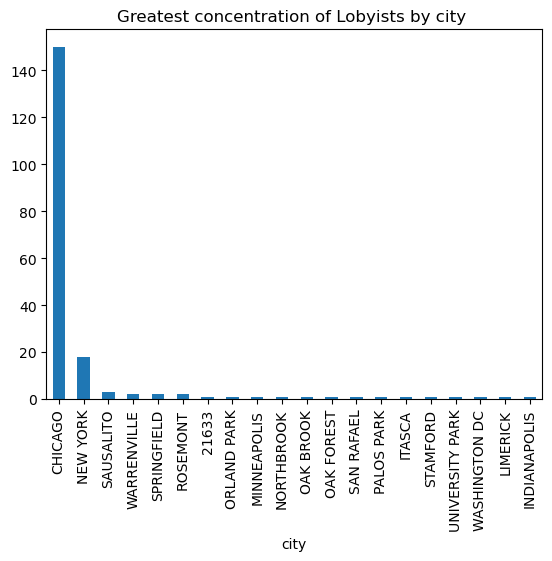

city
CHICAGO            150
NEW YORK            18
SAUSALITO            3
WARRENVILLE          2
SPRINGFIELD          2
ROSEMONT             2
21633                1
ORLAND PARK          1
MINNEAPOLIS          1
NORTHBROOK           1
OAK BROOK            1
OAK FOREST           1
SAN RAFAEL           1
PALOS PARK           1
ITASCA               1
STAMFORD             1
UNIVERSITY PARK      1
WASHINGTON DC        1
LIMERICK             1
INDIANAPOLIS         1
Name: lobbyist_id, dtype: int64

In [143]:
# Group on city and count the number of lobbyists found in that region

df = lobbyist_final_df.groupby(lobbyist_final_df['city']) ['lobbyist_id'].count()

sortedDF=df.sort_values(ascending=False)

top_20_df = sortedDF.head(20)

top_20_df.plot(kind="bar")

plt.title("Greatest concentration of Lobyists by city ")
plt.show()


top_20_df.head(20)

## Who are the most well compensated lobbyists and where are they located? - Compensation table //Andrew

In [ ]:
# Uses lobbyist and compensation dataframes

## Which politician is receiving the most lobbying funds? - Contribution table // Sandhya

In [33]:
# Usews lobbyist and contribution dataframes
# Generate a bar plot showing the Which "Lobbyist" is receiving the most lobbying funds (using Pandas.)

most_funds_received_lobbyist = lobbyist_combo_df_two.groupby(["lobbyist_id"]).count()["amount"]
most_funds_received_lobbyist


lobbyist_id
3734       2
3735      16
3739      98
3740     151
3743      33
        ... 
25731      1
25743      1
25921      1
26141      5
26581      2
Name: amount, Length: 396, dtype: int64

Text(0, 0.5, 'most funds recieved lobbyist')

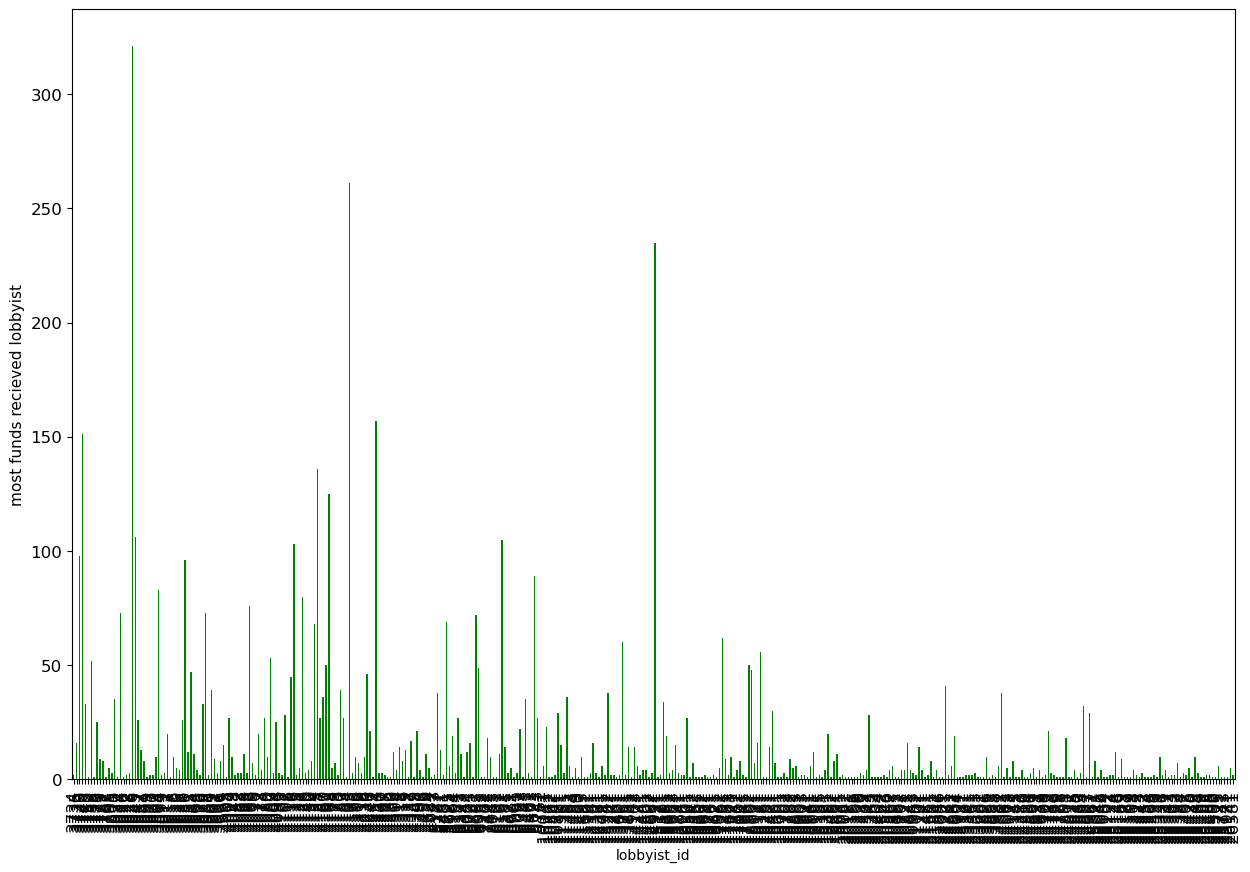

In [36]:
# Bar Plot (Using Pandas): lobbyist_id Vs amount
plot_pandas = most_funds_received_lobbyist.plot.bar(figsize = (15,10), color = 'g', fontsize = 12)
plt.ylabel("most funds recieved lobbyist", fontsize =11)


In [37]:
# Generate a pie plot showing the contribution ID versus recipient (using Pandas)

#groupby contribution_id
groupby_contribution_id = most_funds_received_lobbyist.groupby(["recipient", "amount"])
groupby_contribution_id
contribution_df = pd.DataFrame(groupby_contribution_id.size())

#Create a dataframe with Total count of recipients and amount
total_df = pd.DataFrame(contribution_df.groupby(["recipient"]).count())
total_df.columns = ["Total Count"] # column field Total count of recipients

#Create and Format the percentage of recipients vs amount
total_df["Percentage of amount"] = (100*(total_df["Total Count"]/total_df["Total Count"].sum()))

# format the "Percentage of Sex" column
total_df["Percentage of amount"] = total_df["Percentage of amount"] # assign variable to label

# gender_df
total_df


KeyError: 'recipient'

In [49]:
# To get lat and long from address. Lets Try this code once.

#import requests
geo_url = 'http://maps.googleapis.com/maps/api/geocode/json'
my_address = {'address': '21 Ramkrishana Road, Burdwan, East Burdwan, West Bengal, India',
             'language': 'en'}
response = requests.get(geo_url, params = my_address)
results = response.json()['results']
my_geo = results[0]['geometry']['location']
print("Longitude:",my_geo['lng'],"\n","Latitude:",my_geo['lat'])


IndexError: list index out of range

## What companies are most prevalent in lobbying? - Compensation table // Daniel

In [ ]:
# Your code here